import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import copy

crossover parent 1 and parent 2

In [2]:
def crossover(parent1, parent2):

    child1 = City(is_child=True)
    child2 = City(is_child=True)

    child1.towers = np.concatenate((copy.deepcopy(parent1.towers[:len(parent1.towers) // 2]), copy.deepcopy(parent2.towers[len(parent2.towers) // 2:])))
    child2.towers = np.concatenate((copy.deepcopy(parent2.towers[:len(parent2.towers) // 2]), copy.deepcopy(parent1.towers[len(parent1.towers) // 2:])))
    
    return child1, child2

mutation

In [3]:
def mutation(child):
    # if len(child.towers) > 0:
    for _ in range(np.random.randint(1, len(child.towers))):
        child.towers[np.random.randint(0, len(child.towers))] = Tower([random.uniform(0, 19), random.uniform(0, 19)], random.randint(1, 10000))
    # else:
    #     child = City()
    return child

selection 

In [4]:
def selection(population, limit=50):
    population.sort(key=lambda x: x.fitness_score, reverse=True)
    return population[:limit]

main function to start 

In [5]:
def genetic_algorithm(max_generation=200, population=50, mutation_rate=0.1, crossover_rate=0.9):
    
    # initialize list of cities for each generation
    generation = []
    for i in range(population):
        generation.append(City())

    # initialize the list for fitness
    generation_fitness = []
    for i in range(max_generation):
        generation_fitness.append(0)

    # calculate fitness for each city in the generation
    for j in range(population):
        generation[j].fitness()
    
       
    for i in range(max_generation):
        print(f'start of generation{i}', generation_fitness[i])
        best_selection = selection(generation, limit=int(population * crossover_rate))

        # generate offspring with random parents
        offspring = []

        # apply crossover
        for j in range(0, len(best_selection) - 1, 2):
            child1, child2 = crossover(best_selection[j], best_selection[j + 1])
            offspring.append(child1)
            offspring.append(child2)

        np.random.shuffle(offspring)
        select_offspring = offspring[:int(mutation_rate*len(offspring))]
        # apply mutation
        for j in range(len(select_offspring)):
            offspring[j] = mutation(offspring[j])

        generation += offspring

        
        for j in range(len(generation)):
            generation[j].fitness()

        # selecting the best cities
        generation = selection(generation, limit=population)
        for j in range(population):
            generation_fitness[i] += generation[j].fitness_score
        generation_fitness[i] /= population
        print(f'end of generation{i}', generation_fitness[i])
       
    return generation, generation_fitness




In [6]:
def output(generation, j):
    # open the file to write
    with open(f'generaton{j}.txt', 'w') as f:
        # write the number of towers for each generation
        for i in range(len(generation)):
            f.write(f'-----------------------------generation: {i}---------------------------------\n')
            f.write(f'the number of towers: {len(generation[i].towers)}\n')
            f.write('------------------------------------------------------------------------------\n')
            # write the header for tower list
            f.write('x of tower\t\ty of tower\t\tBW of tower\n')
            for tower in generation[i].towers:
                # write x, y, BW for each generation
                f.write(f'{tower.position[0]}\t{tower.position[1]}\t{tower.BW_ty}\n')
            f.write('------------------------------------------------------------------------------\n')
            # write which block is assigned to a specific tower
            f.write(f'x of block\ty of block\tx of assigned tower\t\ty of assigned tower\n')
            for row in generation[i].blocks:
                for block in row:
                    f.write(f'{block.position[0]}\t\t{block.position[1]}\t\t{block.connected_tower.position[0]}\t{block.connected_tower.position[1]}\n')

+ num_generations=200 
+ population=50
+ mutation_rate=0.1
+ crossover_rate=0.9
+ city_size=20

In [12]:
generation1, generation_fitness1 = genetic_algorithm(200,50,0.1,0.9)

start of generation0 0
end of generation0 70433.46
start of generation1 0
end of generation1 122572.32
start of generation2 0
end of generation2 152488.72
start of generation3 0
end of generation3 165821.28
start of generation4 0
end of generation4 176907.54
start of generation5 0
end of generation5 186381.68
start of generation6 0
end of generation6 192782.3
start of generation7 0
end of generation7 200308.02
start of generation8 0
end of generation8 205741.44
start of generation9 0
end of generation9 208944.32
start of generation10 0
end of generation10 211118.24
start of generation11 0
end of generation11 212640.7
start of generation12 0
end of generation12 215547.7
start of generation13 0
end of generation13 220659.68
start of generation14 0
end of generation14 222919.9
start of generation15 0
end of generation15 225254.58
start of generation16 0
end of generation16 226586.9
start of generation17 0
end of generation17 229499.66
start of generation18 0
end of generation18 231349.04


end of generation151 309398.62
start of generation152 0
end of generation152 310819.62
start of generation153 0
end of generation153 310985.34
start of generation154 0
end of generation154 310985.34
start of generation155 0
end of generation155 311091.8
start of generation156 0
end of generation156 311091.8
start of generation157 0
end of generation157 311091.8
start of generation158 0
end of generation158 311091.8
start of generation159 0
end of generation159 311091.8
start of generation160 0
end of generation160 311091.8
start of generation161 0
end of generation161 311091.8
start of generation162 0
end of generation162 311091.8
start of generation163 0
end of generation163 311091.8
start of generation164 0
end of generation164 311250.76
start of generation165 0
end of generation165 311250.76
start of generation166 0
end of generation166 311414.9
start of generation167 0
end of generation167 312872.22
start of generation168 0
end of generation168 312872.22
start of generation169 0
en

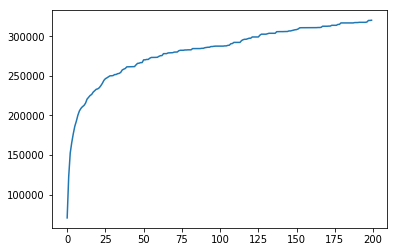

In [13]:
output(generation1, 1)
plt.plot(generation_fitness1)
plt.show()

+ num_generations=200 
+ population=50
+ mutation_rate=0.1
+ crossover_rate=0.1
+ city_size=20

In [ ]:
generation2, generation_fitness2 = genetic_algorithm(200,50,0.1,0.1)

In [ ]:
output(generation2, 2)
plt.plot(generation_fitness2)
plt.show()

+ num_generations=200 
+ population=50
+ mutation_rate=0.9
+ crossover_rate=0.9
+ city_size=20

In [ ]:
generation3, generation_fitness3 = genetic_algorithm(200,50,0.9,0.9)

In [ ]:
output(generation3, 3)
plt.plot(generation_fitness3)
plt.show()

+ num_generations=200 
+ population=50
+ mutation_rate=0.9
+ crossover_rate=0.1
+ city_size=20

In [ ]:
generation4, generation_fitness4 = genetic_algorithm(200,50,0.9,0.1)

In [ ]:
output(generation4, 4)
plt.plot(generation_fitness4)
plt.show()